In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

import scipy.stats as stats
from scipy.stats import normaltest

import statsmodels.api as sm
import numpy as np
!pip install paretoset
from paretoset import paretoset

# Modelos

## Objetivos


    - Formular matematicamente modelos para sistemas.
    - Utilizar algoritmos estadísticos para el ajuste de modelos.

Un modelo es una representación de la realidad en la que se describe matemáticamente el patrón que relaciona las señales y los sistemas.

Puede ser una simplificación abstracta de un fenómeno del mundo real, una estructura de datos que organiza información, o un algoritmo que realiza una tarea específica.

Los modelos se utilizan en varias aplicaciones, como predicción, simulación, clasificación, optimización y toma de decisiones, para comprender, analizar y resolver problemas complejos.

La elección y construcción adecuada de modelos es esencial para abordar problemas en ingeniería.

Retomando las gráficas de dispersión ya analizadas...





In [ ]:
# URL = 'http://ftp.esat.kuleuven.ac.be/pub/SISTA/data/process_industry/powerplant.txt'
URL = 'http://ftp.esat.kuleuven.ac.be/pub/SISTA/data/thermic/thermic_res_wall.txt'
URLdata =   URL[: URL.rfind('.')] + '.dat.gz'
fname = URL[URL.rfind('/')+1:]
fnamedata  = URLdata[URLdata.rfind('/')+1:]
!wget {URLdata};
!wget {URL};
!gunzip {fnamedata};

--2023-11-20 17:10:44--  http://ftp.esat.kuleuven.ac.be/pub/SISTA/data/thermic/thermic_res_wall.dat.gz
Resolving ftp.esat.kuleuven.ac.be (ftp.esat.kuleuven.ac.be)... 134.58.56.3, 2a02:2c40:0:a401::3
Connecting to ftp.esat.kuleuven.ac.be (ftp.esat.kuleuven.ac.be)|134.58.56.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13767 (13K) [application/x-gzip]
Saving to: ‘thermic_res_wall.dat.gz’

thermic_res_wall.da 100%[===================>]  13.44K  --.-KB/s    in 0.001s  

2023-11-20 17:10:45 (20.0 MB/s) - ‘thermic_res_wall.dat.gz’ saved [13767/13767]

--2023-11-20 17:10:46--  http://ftp.esat.kuleuven.ac.be/pub/SISTA/data/thermic/thermic_res_wall.txt
Resolving ftp.esat.kuleuven.ac.be (ftp.esat.kuleuven.ac.be)... 134.58.56.3, 2a02:2c40:0:a401::3
Connecting to ftp.esat.kuleuven.ac.be (ftp.esat.kuleuven.ac.be)|134.58.56.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 868 [text/plain]
Saving to: ‘thermic_res_wall.txt’

thermic_res_wall.tx 10

In [ ]:
# datos = pd.read_csv(fnamedata[:-3],sep="\t",header = None)
datos = pd.read_csv(fnamedata[:-3],sep='\t',header = None).reset_index().rename(columns = {'index':'sample'})
columnas = {0: 'U1_k',
            1: 'U2_k',
            2: 'Y_k'}
Ts = 10
datos['time'] = Ts*(datos['sample'])
datos.head(5)
datos.rename(columns=columnas,inplace=True)
# datos.drop(12,axis=1,inplace=True)
datos.drop(3,axis=1,inplace=True)
datos
with open(fname) as f:
    contents = f.read()
    print(contents)
print(URLdata)

Contributed by:
	Favoreel
	KULeuven
	Departement Electrotechniek ESAT/SISTA
	Kardinaal Mercierlaan 94
	B-3001 Leuven
	Belgium
	wouter.favoreel@esat.kuleuven.ac.be
Description:
	Heat flow density through a two layer wall (brick and insulation 
	layer). The inputs are the internal and external temperature of 
	the wall.  The output is the heat flow density through the wall. 
Sampling:
Number:
	1680
Inputs:
	u1: internal wall temperature
	u2: external wall temperature
Outputs:
	y: heat flow density through the wall
References:
	- System Identification Competition, Benchmark tests for estimation 
	  methods of thermal characteristics of buildings and building 
	  components. Organization: J. Bloem, Joint Research Centre, 
	  Ispra, Italy, 1994.

Properties:
Columns:
	Column 1: input u1
	Column 2: input u2
	Column 3: output y
Category:
	thermic systems
Where:


http://ftp.esat.kuleuven.ac.be/pub/SISTA/data/thermic/thermic_res_wall.dat.gz


Comportamiento temporal

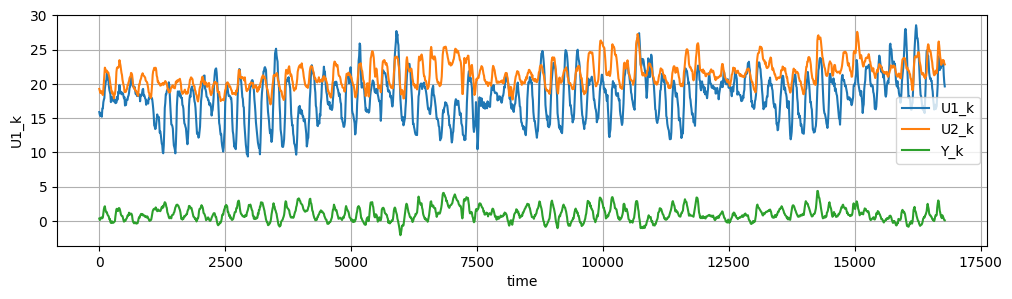

In [ ]:
plt.figure(figsize=(12,3)) # Determina el tamaño de la gráfica
# sns.lineplot(data = datos, x = 'time', y = 'reheat steam temperature',label = 'reheat steam temperature') # Gráfica de un comportamiento temporal
# sns.lineplot(data = datos, x = 'time', y = 'R_reheat steam temperature',label = 'R reheat steam temperature') # Gráfica de un comportamiento temporal
sns.lineplot(data = datos, x = 'time', y = 'U1_k',label = 'U1_k')
sns.lineplot(data = datos, x = 'time', y = 'U2_k',label = 'U2_k')
sns.lineplot(data = datos, x = 'time', y = 'Y_k',label = 'Y_k')

plt.grid()# Grafica una cuadrícula

**Gráficas scatter**

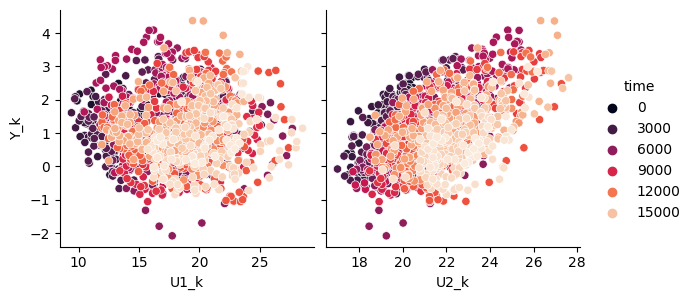

In [ ]:
# sns.set(rc={'figure.figsize':(1,1)})
sns.pairplot(datos,hue='time',palette='rocket',
             x_vars = ['U1_k','U2_k'],
             y_vars = ['Y_k'],
             height= 3) # Scatter entre todas las variables exceptuando time y samples


**Gráficas de histogramas**

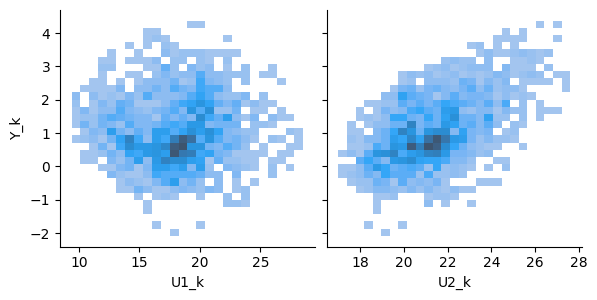

In [ ]:
sns.pairplot(datos,
             x_vars = ['U1_k','U2_k'],
             y_vars = ['Y_k'],
             height= 3,kind='hist') # Scatter entre todas las variables exceptuando time y samples

## Ajuste de modelos lineales


Aunque la gráfica muestra poca dependencia entre las señales $Y$ y $U1$, se tratará de ajustar el modelo

$$Y[k] = \alpha U1[k]+\beta$$

In [ ]:
hipotesis0 = 'Y_k ~ U1_k'
Modelo0 = sm.formula.ols(formula = hipotesis0,data = datos).fit()
Modelo0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Y_k   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.333
Date:                Tue, 14 Nov 2023   Prob (F-statistic):              0.248
Time:                        23:49:46   Log-Likelihood:                -2338.4
No. Observations:                1680   AIC:                             4681.
Df Residuals:                    1678   BIC:                             4692.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8902      0.131      6.813      0.000       0.634       1.146
U1_k           0.0082      0.007      1.155      0.248      -0.006       0.022
==============================================================================
Omnibus:                       41.517   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.261
Skew:                           0.397   Prob(JB):                     2.45e-10
Kurtosis:                       2.963   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Análisis

- $AIC$: Esta métrica permite identificar el modelo que mejor explica las variaciones en la variable dependiente, a partir de una métrica de similitud $L$, penalizando la cantidad $K$ de parámetros. Se calcula como $2K-\ln(L)$.

- $R^2$: Este coeficiente indica  qué porcentaje de la variación que se presenta en la variable dependiente se explica por las variables independientes.

- Estadístico $F$ y $Prob(F)$: Indican la calidad del ajuste del modelo a los datos. Particularmente, $Prob(F)$ cercanos a $0$ permiten rechazar la hipótesis nula de independencia entre la variable dependiente y la que se consideró independiente.



Es decir, el modelo ajustado es:

$$Y[k] = 0.0082 \cdot U1[k] - 0.8902 \text{ con }$$
$$ R^2 = 0.001$$
$$ Prob(F) = 0.248$$
$$ AIC = 4681$$

¿Qué podría decir de este modelo?

Una primera idea de modelo podría ser:

$$Y[k] = \alpha U2[k]+\beta$$

In [ ]:
hipotesis1 = 'Y_k ~ U2_k'
Modelo1 = sm.formula.ols(formula = hipotesis1,data = datos).fit()
Modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Y_k   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     683.2
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.24e-126
Time:                        23:49:46   Log-Likelihood:                -2052.1
No. Observations:                1680   AIC:                             4108.
Df Residuals:                    1678   BIC:                             4119.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0357      0.233    -21.590      0.000      -5.493      -4.578
U2_k           0.2847      0.011     26.139      0.000       0.263       0.306
==============================================================================
Omnibus:                        3.456   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                3.512
Skew:                           0.101   Prob(JB):                        0.173
Kurtosis:                       2.903   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Es decir, el modelo ajustado es:

$$Y[k] = 0.284737 \cdot U2[k] - 5.035651 \text{ con }$$
$$ R^2 = 0.289$$
$$ Prob(F) = 1.24 \cdot 10^{-126}$$
$$ AIC = 4108$$

- ¿Es suficiente este modelo o puede encontrar alguno que explique mejor el fenómeno?

Este modelo no incorpora información histórica del comportamiento del sistema.

Se revisará también la historia del sistema haciendo uso de valores anteriores de las señales.

In [ ]:
datos_ext = datos.copy()
datos_ext['U1_k1'] = datos_ext['U1_k'].shift(periods = 1)
datos_ext['U1_k2'] = datos_ext['U1_k'].shift(periods = 2)
datos_ext['U1_k3'] = datos_ext['U1_k'].shift(periods = 3)
datos_ext['U2_k1'] = datos_ext['U2_k'].shift(periods = 1)
datos_ext['U2_k2'] = datos_ext['U2_k'].shift(periods = 2)
datos_ext['U2_k3'] = datos_ext['U2_k'].shift(periods = 3)
datos_ext['Y_k1'] = datos_ext['Y_k'].shift(periods = 1)
datos_ext['Y_k2'] = datos_ext['Y_k'].shift(periods = 2)
datos_ext['Y_k3'] = datos_ext['Y_k'].shift(periods = 3)
datos_ext.dropna(inplace=True)
datos_ext.head(5)

,sample,U1_k,U2_k,Y_k,time,U1_k1,U1_k2,U1_k3,U2_k1,U2_k2,U2_k3,Y_k1,Y_k2,Y_k3
3,3,15.74,18.84,0.423,30,15.31,15.50,15.89,18.68,18.95,19.27,0.301,0.127,0.350
4,4,15.70,18.94,0.510,40,15.74,15.31,15.50,18.84,18.68,18.95,0.423,0.301,0.127
5,5,15.21,18.68,0.371,50,15.70,15.74,15.31,18.94,18.84,18.68,0.510,0.423,0.301
6,6,16.41,18.55,0.397,60,15.21,15.70,15.74,18.68,18.94,18.84,0.371,0.510,0.423
7,7,16.42,18.37,0.508,70,16.41,15.21,15.70,18.55,18.68,18.94,0.397,0.371,0.510


In [ ]:
hipotesis2 = 'Y_k ~ U2_k + U2_k1 + U2_k2 + U1_k + U1_k1 +U1_k2 + Y_k1 + Y_k2'
Modelo2 = sm.formula.ols(formula = hipotesis2,data = datos_ext).fit()
Modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Y_k   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     8213.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:49:47   Log-Likelihood:                 765.93
No. Observations:                1677   AIC:                            -1514.
Df Residuals:                    1668   BIC:                            -1465.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2534      0.058      4.334      0.000       0.139       0.368
U2_k           0.3977      0.011     34.721      0.000       0.375       0.420
U2_k1         -0.2334      0.017    -13.626      0.000      -0.267      -0.200
U2_k2         -0.1097      0.011     -9.695      0.000      -0.132      -0.088
U1_k           0.0322      0.005      6.340      0.000       0.022       0.042
U1_k1         -0.0297      0.008     -3.498      0.000      -0.046      -0.013
U1_k2         -0.0682      0.006    -11.765      0.000      -0.080      -0.057
Y_k1           0.4780      0.026     18.338      0.000       0.427       0.529
Y_k2           0.3008      0.023     13.155      0.000       0.256       0.346
==============================================================================
Omnibus:                        3.662   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                3.581
Skew:                           0.111   Prob(JB):                        0.167
Kurtosis:                       3.047   Cond. No.                         763.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Es decir, el modelo ajustado es:

$$Y[k] = 0.3977 U2[k] - 0.2334 U2[k-1] -0.1097 U2[k-2]
+ 0.0322 U1[k] -0.0297 U1[k-1] -0.0682 U1[k-2]
+ 0.4780	Y[k-1] + 0.3008 Y[k-2] +	0.2534$$

$$\text{ con }$$
$$ R^2 = 0.975$$
$$ Prob(F) = 0.00$$
$$ AIC = -1514$$

A modo de resumen de los 3 modelos obtenidos anteriormente, se reunen los parámetros en la siguiente tabla.

|Modelo | $R^2$ | AIC |  $U1_k$ | $U1_{k-1}$ | $U1_{k-2}$ | $U2_k$ | $U2_{k-1}$ | $U2_{k-2}$ | $Y_{k-1}$ | $Y_{k-2}$ | $U1_k \cdot U2_k$ |1 |
|-|-|-|-|-|-|-|-|-|-|-|-|-|
|0|0.001|4681|0.0082|-|-|-|-|-|-|-|-|-0.8902|
|1|0.289|4108|-|-|-|0.2848|-|-|-|-|-|-5.0357|
|2|0.975|-1514|0.0322|-0.0297|-0.0682|0.3977|-0.2334|-0.1097|0.4780|0.3008|-|0.2534|




| Algo | x1 | x2 |
|------|----|----|
| ds   | 2  |  s |

- Proponga 3 nuevas hipótesis explicando de dónde surge la idea.
- Obtenga el modelo de cada hipótesis y compare con los modelos obtenidos.
- ¿Cuál es  un buen modelo para el sistema?
- ¿Le parece que comparar con los estadísticos presentados hasta ahora es suficiente para obtener un modelo?

In [ ]:
datos_ext['sinU1_k'] = np.sin(datos_ext['U1_k'])
hipotesis1 = 'Y_k ~ U1_k2 + U1_k3'

datos_ext

,sample,U1_k,U2_k,Y_k,time,U1_k1,U1_k2,U1_k3,U2_k1,U2_k2,U2_k3,Y_k1,Y_k2,Y_k3,sinU1_k
3,3,15.74,18.84,0.423,30,15.31,15.50,15.89,18.68,18.95,19.27,0.301,0.127,0.350,-0.032031
4,4,15.70,18.94,0.510,40,15.74,15.31,15.50,18.84,18.68,18.95,0.423,0.301,0.127,0.007963
5,5,15.21,18.68,0.371,50,15.70,15.74,15.31,18.94,18.84,18.68,0.510,0.423,0.301,0.477637
6,6,16.41,18.55,0.397,60,15.21,15.70,15.74,18.68,18.94,18.84,0.371,0.510,0.423,-0.645774
7,7,16.42,18.37,0.508,70,16.41,15.21,15.70,18.55,18.68,18.94,0.397,0.371,0.510,-0.653377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,23.33,23.48,0.689,16750,23.11,22.65,22.59,23.32,23.01,22.77,0.839,0.405,0.629,-0.973221
1676,1676,22.96,23.25,0.519,16760,23.33,23.11,22.65,23.48,23.32,23.01,0.689,0.839,0.405,-0.824236
1677,1677,21.30,23.41,0.299,16770,22.96,23.33,23.11,23.25,23.48,23.32,0.519,0.689,0.839,0.637423
1678,1678,20.22,23.01,0.121,16780,21.30,22.96,23.33,23.41,23.25,23.48,0.299,0.519,0.689,0.979997


In [ ]:
m.aic

NameError: ignored

In [ ]:
hipotesis = [#
             ]
AIC = []
F = []
R2 = []
Pf = []
MSE = []
for h in hipotesis:
  m = sm.formula.ols(formula = h,data = datos_ext).fit()
  AIC.append(m.aic)
  F.append(m.fvalue)
  R2.append(m.rsquared)
  Pf.append(m.f_pvalue)
  MSE.append(m.mse_model)
modelos = pd.DataFrame(data = {'Hipotesis': hipotesis,
                               'AIC':AIC,
                               'F':F,
                               'Pf':Pf,
                               'MSE':MSE,
                               'R2':R2})
modelos

In [ ]:
modelos[medidas[0]]

In [ ]:
medidas = [['AIC','R2'],
           ['min','max']]
mask1 = paretoset(modelos[medidas[0]],
                 sense=medidas[1])
modelos['mask1'] = np.where( mask1, 'Óptimo', 'Modelo')


In [ ]:
modelos[modelos['mask1']=='Óptimo']

In [ ]:
sns.pairplot(data= modelos,hue = 'mask1')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# arima_res = ARIMA(y, order=(1, 0, 0), trend="c").fit()
arima_res = ARIMA(endog=datos['Y_k'],exog= datos[['U2_k']],order=(5,5,5)).fit()

In [ ]:
arima_res.summary()

In [ ]:
sarix = sm.tsa.SARIMAX(endog=datos['Y_k'],exog= datos[['U2_k']],order=(2,2,2)).fit()
sarix.summary()

In [ ]:
sarix.params['U2_k']

In [ ]:
# Coeficientes AR
ar_coefs = sarix.arparams  # Lista de coeficientes AR

# Coeficientes MA
ma_coefs = sarix.maparams  # Lista de coeficientes MA

# Coeficiente de la entrada exógena
b = sarix.params['U2_k']  # Coeficiente de la entrada exógena
